<a href="https://colab.research.google.com/github/umarpir/HousePricePredictor/blob/main/House_price_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from google.colab import files
upload = files.upload()
from pandas.core.common import random_state
from math import sqrt

Saving BostonHousing.csv to BostonHousing (1).csv


importing the uk house price data set

In [3]:
house_price_dataset = pd.read_csv('BostonHousing.csv')


In [4]:
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [5]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# check the sumber of rows and columns
house_price_dataframe.shape

(506, 14)

In [7]:
# check for missing values
house_price_dataframe.isnull().sum() 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
#drop columns that have any missing values
house_price_dataframe = house_price_dataframe.dropna(how='any')

In [9]:
# check again for missing values
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
# check the number of rows and columns again
house_price_dataframe.shape

(506, 14)

In [11]:
house_price_dataframe.describe(include = 'all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


understanding the correlation in the data

In [12]:
#house_price_dataframe['Post code']=house_price_dataframe['Post code'].astype('category').cat.codes
#house_price_dataframe['House Type']=house_price_dataframe['House Type'].astype('category').cat.codes
#house_price_dataframe['New Build']=house_price_dataframe['New Build'].astype('category').cat.codes
#house_price_dataframe['Estate Type']=house_price_dataframe['Estate Type'].astype('category').cat.codes
#house_price_dataframe['Town/City']=house_price_dataframe['Town/City'].astype('category').cat.codes
#house_price_dataframe['District']=house_price_dataframe['District'].astype('category').cat.codes
#house_price_dataframe['County']=house_price_dataframe['County'].astype('category').cat.codes
correlation = house_price_dataframe.corr()

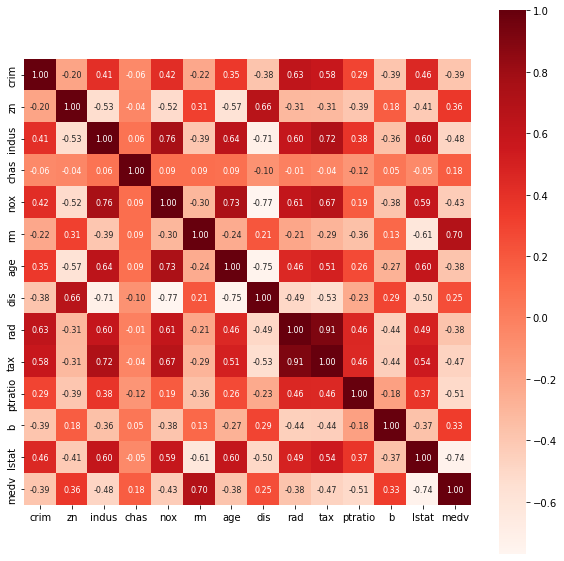

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt = '.2f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [14]:

X = house_price_dataframe.drop(['medv'], axis=1)
Y = house_price_dataframe['medv']

In [15]:
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [16]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size= 0.2,random_state= 45)

In [17]:
print(X.shape,X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [18]:
print(X_train.dtypes)
print(Y_train.dtypes)


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object
float64


model traing using XGboost regression model

In [19]:
#load the model
model = XGBRegressor()

In [20]:
#TRAIN THE MODEL WITH x TRAIN
model.fit(X_train, Y_train)

[16:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [21]:
# accuracy
training_data_prediction = model.predict(X_train)

In [22]:
print(training_data_prediction)

[22.74956   26.809343  22.155033  20.97027   24.713943  19.474916
 14.237658  16.588202  24.194536   8.235487   9.411899  22.79884
 22.722754  34.27176   14.489476  13.741556  14.301982  45.96501
 21.464462  20.348677  23.593706   9.219109  24.348076  27.56919
 22.754461  33.32732   32.94639   13.415902  25.517366  20.53947
 17.251282  19.096443  19.480814  18.247837  15.812621  30.926949
 24.218922  22.053083  36.287846  21.521572  21.463434  18.902893
 15.189289  20.965351  21.463434  15.787893  18.918596  20.169073
 49.45842   12.292925  30.441969  33.748302  32.264214   9.382061
 16.522394  15.280781  20.763578  11.800116  23.176502  26.543285
 20.554865  21.184265  23.368717  18.840887  19.018969  30.892723
 21.912916  21.09134   21.043447  24.253784  23.056498  21.793427
 15.244675  24.11003   48.49369   36.87882   20.567509  19.2663
 18.256193  21.13075   21.046932  22.78038   33.744423  24.276064
 16.136473  16.593296  17.042797  12.107549   9.942992  23.55828
 21.483084  17.84

Text(0.5, 1.0, 'Actual vs Predicted prices')

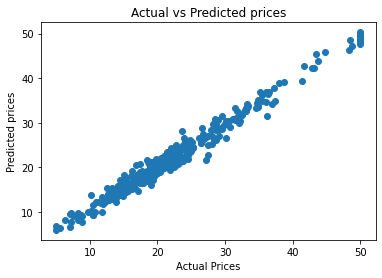

In [23]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

RMSE :  1.326630852121398
MAE :  1.0217881554424173


In [25]:
testdata_prediction = model.predict(X_test)


Text(0.5, 1.0, 'Actual vs Predicted prices')

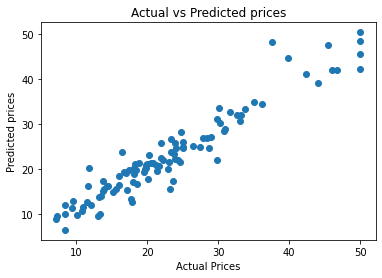

In [26]:
plt.scatter(Y_test,testdata_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted prices")

In [28]:
#RMSE
score1 = sqrt(metrics.mean_squared_error(Y_test,testdata_prediction))

#mean Absolute error
score2 = metrics.mean_absolute_error(Y_test,testdata_prediction)

print("RMSE : " , score1)
print("MAE : " , score2)

RMSE :  3.0290088410761165
MAE :  2.2416075893476894
